In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
target_1 = 'Rating_Score'
target_2 = 'Purchase'
target_3 = 'Number_of_Purchases'

In [ ]:
url = '/content/Team Assignment 1 Data.csv'

df = pd.read_csv(url, delimiter= ';', decimal=',')

In [ ]:
df.head(5)

,Review_ID,Number_Words_Review,ZNumber_Words_Review,Prod_Desig,Prod_Design_positive,Prod_Design_negative,Prod_Technical,Prod_Technical_positive,Prod_Technical_negative,Prod_Price,...,Serv_Delivery_positive,Serv_Delivery_negative,Category,Country,Gender,Age,Sentiment,Rating_Score,Purchase,Number_of_Purchases
0,1,34,-0.178829,1,1,0,1,1,0,0,...,0,0,0,1,0,24.563275,4,5,1,1
1,2,32,-0.225796,1,1,0,1,1,0,1,...,0,0,0,1,0,38.271205,5,4,0,0
2,3,54,0.290846,1,0,1,1,0,1,1,...,0,1,0,1,0,46.772399,2,2,0,0
3,4,20,-0.507602,1,1,0,1,1,0,0,...,0,0,0,1,0,31.665392,5,5,1,2
4,5,12,-0.695472,1,1,0,1,1,0,0,...,0,0,0,1,0,25.319392,3,5,0,0


In [ ]:
df.shape

(600, 23)

In [ ]:
#Checking if there are identifyers
(df.shape[0]/df.nunique()).sort_values()

,0
Review_ID,1.000000
Age,1.000000
ZNumber_Words_Review,4.761905
Number_Words_Review,4.761905
Sentiment,120.000000
Rating_Score,120.000000
Number_of_Purchases,150.000000
Category,200.000000
Prod_Technical_positive,300.000000
Prod_Technical_negative,300.000000


In [ ]:
df['Category'].value_counts()

,count
Category,
0,200
1,200
2,200


In [ ]:
import pandas as pd

# Creating the dummy
dummies = pd.get_dummies(df['Category'], prefix='Category')

# Deleting the Category== 2
dummies.drop('Category_2', axis=1, inplace=True)

# Concatenating with the original DF
df = pd.concat([df, dummies], axis=1)

# Deleting the original category
df.drop('Category', axis=1, inplace=True)

df.head()



,Review_ID,Number_Words_Review,ZNumber_Words_Review,Prod_Desig,Prod_Design_positive,Prod_Design_negative,Prod_Technical,Prod_Technical_positive,Prod_Technical_negative,Prod_Price,...,Serv_Delivery_negative,Country,Gender,Age,Sentiment,Rating_Score,Purchase,Number_of_Purchases,Category_0,Category_1
0,1,34,-0.178829,1,1,0,1,1,0,0,...,0,1,0,24.563275,4,5,1,1,True,False
1,2,32,-0.225796,1,1,0,1,1,0,1,...,0,1,0,38.271205,5,4,0,0,True,False
2,3,54,0.290846,1,0,1,1,0,1,1,...,1,1,0,46.772399,2,2,0,0,True,False
3,4,20,-0.507602,1,1,0,1,1,0,0,...,0,1,0,31.665392,5,5,1,2,True,False
4,5,12,-0.695472,1,1,0,1,1,0,0,...,0,1,0,25.319392,3,5,0,0,True,False


In [ ]:
df.dtypes

,0
Review_ID,int64
Number_Words_Review,int64
ZNumber_Words_Review,float64
Prod_Desig,int64
Prod_Design_positive,int64
Prod_Design_negative,int64
Prod_Technical,int64
Prod_Technical_positive,int64
Prod_Technical_negative,int64
Prod_Price,int64


In [ ]:
df[['Category_0', 'Category_1']] = df[['Category_0', 'Category_1']].astype(int)
#Converting dummies to Boolean, for
#having only numeric column types

In [ ]:
df['Category_0']

,Category_0
0,1
1,1
2,1
3,1
4,1
...,...
595,0
596,0
597,0
598,0


# Question 1: Rating Scores

In [ ]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [ ]:
X = df.drop([target_1], axis=1)
y_1 = df[target_1]

In [ ]:
X.head(2)

,Review_ID,Number_Words_Review,ZNumber_Words_Review,Prod_Desig,Prod_Design_positive,Prod_Design_negative,Prod_Technical,Prod_Technical_positive,Prod_Technical_negative,Prod_Price,...,Serv_Delivery_positive,Serv_Delivery_negative,Country,Gender,Age,Sentiment,Purchase,Number_of_Purchases,Category_0,Category_1
0,1,34,-0.178829,1,1,0,1,1,0,0,...,0,0,1,0,24.563275,4,1,1,1,0
1,2,32,-0.225796,1,1,0,1,1,0,1,...,0,0,1,0,38.271205,5,0,0,1,0


In [ ]:
# Fit Ordered Logit Model
#We don't use a constant, since this model has already a constant incorporated
model = OrderedModel(y_1, X, distr='logit')  # Use 'probit' instead of 'logit' if needed
result = model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.725711
         Iterations: 102
         Function evaluations: 107
         Gradient evaluations: 107


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:           Rating_Score   Log-Likelihood:                -435.43
Model:                   OrderedModel   AIC:                             924.9
Method:            Maximum Likelihood   BIC:                             1044.
Date:                Wed, 19 Mar 2025                                         
Time:                        12:37:50                                         
No. Observations:                 600                                         
Df Residuals:                     573                                         
Df Model:                          23                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Review_ID                   0.0009        nan        nan        nan         nan         nan
Number_Words_

In [ ]:
X['Serv_Delivery'].value_counts()

,count
Serv_Delivery,
0,564
1,36


In [ ]:
X['Serv_Delivery_positive'].value_counts()

,count
Serv_Delivery_positive,
0,576
1,24


In [ ]:
X['Serv_Delivery_negative'].value_counts()

,count
Serv_Delivery_negative,
0,588
1,12


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Class of Tuesday, checking Multicollinearity

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


                   Variable         VIF
0                 Review_ID    5.458323
1       Number_Words_Review  119.323236
2      ZNumber_Words_Review   59.749213
3                Prod_Desig   12.722363
4      Prod_Design_positive    6.843166
5      Prod_Design_negative    3.347517
6            Prod_Technical   22.383772
7   Prod_Technical_positive   13.967199
8   Prod_Technical_negative    3.156720
9                Prod_Price         inf
10      Prod_Price_positive         inf
11      Prod_Price_negative         inf
12            Serv_Delivery         inf
13   Serv_Delivery_positive         inf
14   Serv_Delivery_negative         inf
15                  Country    3.219208
16                   Gender    1.843054
17                      Age   10.437517
18                Sentiment   23.013739
19                 Purchase    1.454774
20      Number_of_Purchases    1.782616
21               Category_0    2.453099
22               Category_1    2.465326


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
# We clean the original variables of the ones with a Dummies(first 4), the ID, and the variable that was Standardized
X_cleaned = X.drop(['Serv_Delivery', 'Prod_Price', 'Prod_Technical', 'Prod_Desig', 'Review_ID','Number_Words_Review', 'Sentiment'], axis=1)

# Verificar las columnas restantes
print(X_cleaned.columns)

Index(['ZNumber_Words_Review', 'Prod_Design_positive', 'Prod_Design_negative',
       'Prod_Technical_positive', 'Prod_Technical_negative',
       'Prod_Price_positive', 'Prod_Price_negative', 'Serv_Delivery_positive',
       'Serv_Delivery_negative', 'Country', 'Gender', 'Age', 'Purchase',
       'Number_of_Purchases', 'Category_0', 'Category_1'],
      dtype='object')


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X_cleaned.columns
vif_data["VIF"] = [variance_inflation_factor(X_cleaned.values, i) for i in range(len(X_cleaned.columns))]
print(vif_data)


                   Variable       VIF
0      ZNumber_Words_Review  1.179283
1      Prod_Design_positive  2.069363
2      Prod_Design_negative  1.587995
3   Prod_Technical_positive  3.931966
4   Prod_Technical_negative  1.562792
5       Prod_Price_positive  1.381268
6       Prod_Price_negative  1.145988
7    Serv_Delivery_positive  1.071229
8    Serv_Delivery_negative  1.085763
9                   Country  2.082919
10                   Gender  1.789797
11                      Age  6.520830
12                 Purchase  1.392090
13      Number_of_Purchases  1.679313
14               Category_0  2.089307
15               Category_1  2.284115


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_cleaned.columns
vif_data["VIF"] = [variance_inflation_factor(X_cleaned.values, i) for i in range(X_cleaned.shape[1])]

# Calcular la tolerancia
vif_data["Tolerancia"] = 1 / vif_data["VIF"]

# Mostrar los resultados
print(vif_data)


                   Variable       VIF  Tolerancia
0      ZNumber_Words_Review  1.179283    0.847973
1      Prod_Design_positive  2.069363    0.483241
2      Prod_Design_negative  1.587995    0.629725
3   Prod_Technical_positive  3.931966    0.254326
4   Prod_Technical_negative  1.562792    0.639881
5       Prod_Price_positive  1.381268    0.723972
6       Prod_Price_negative  1.145988    0.872609
7    Serv_Delivery_positive  1.071229    0.933508
8    Serv_Delivery_negative  1.085763    0.921011
9                   Country  2.082919    0.480096
10                   Gender  1.789797    0.558723
11                      Age  6.520830    0.153355
12                 Purchase  1.392090    0.718344
13      Number_of_Purchases  1.679313    0.595482
14               Category_0  2.089307    0.478628
15               Category_1  2.284115    0.437806


We keep Sentiment because it makes sense that the Sentiment is related with the other variables, since it's the product of a text analysis. And we need it, since it's good to explain the score of each review.

And most importantly, because we're going to use OLS, and a variable that explains the linearity as the Sentiment variable does, it's really useful.

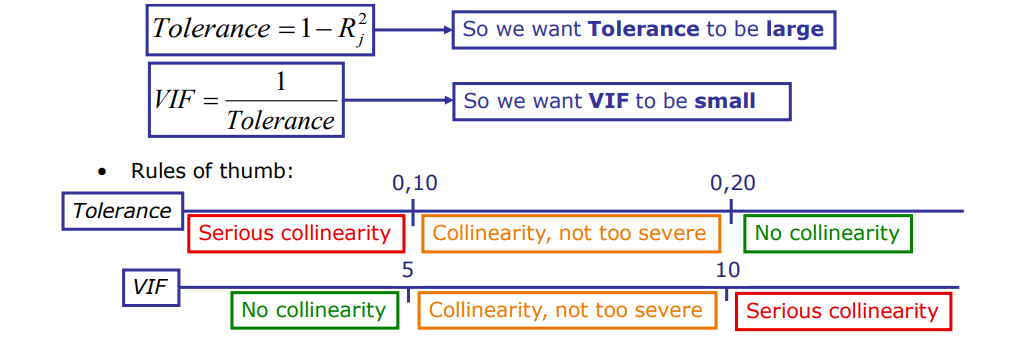

In [ ]:
import statsmodels.api as sm

# Ajustar un modelo OLS
X = sm.add_constant(X_cleaned)  # Añadir una constante al modelo
model_ols = sm.OLS(y_1, X)
result_ols = model_ols.fit()

# Imprimir los resultados
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:           Rating_Score   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     48.89
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.52e-96
Time:                        12:37:51   Log-Likelihood:                -724.43
No. Observations:                 600   AIC:                             1483.
Df Residuals:                     583   BIC:                             1558.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Statistically significant columns:
columns_significatives = [
     'Prod_Design_positive', 'Prod_Technical_positive',
    'Prod_Technical_negative', 'Serv_Delivery_negative', 'Country',
    'Sentiment', 'Category_0', 'Category_1'
]



We have 8 significant columns

Product technical positive & product technical negative were the two most significant columns, since their T values are the greatest ones

# 2: Purchase incidence

Problem: target variable is extremely imbalanced. We have to deal with it

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy = df.drop(['Serv_Delivery', 'Prod_Price', 'Prod_Technical', 'Prod_Desig', 'Review_ID','Number_Words_Review', 'Sentiment'], axis=1)

In [ ]:
X_2 = df_copy.drop(target_2, axis=1)
y_2 = df[target_2]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculando el VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_2.columns
vif_data["VIF"] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]

# Agregando la columna de Tolerancia (1/VIF)
vif_data["Tolerance"] = 1 / vif_data["VIF"]

# Imprimir el DataFrame
print(vif_data)


                   Variable        VIF  Tolerance
0      ZNumber_Words_Review   1.194469   0.837192
1      Prod_Design_positive   2.453413   0.407595
2      Prod_Design_negative   1.575741   0.634622
3   Prod_Technical_positive   6.117937   0.163454
4   Prod_Technical_negative   1.567475   0.637969
5       Prod_Price_positive   1.402532   0.712996
6       Prod_Price_negative   1.147207   0.871682
7    Serv_Delivery_positive   1.106015   0.904147
8    Serv_Delivery_negative   1.087937   0.919171
9                   Country   2.198051   0.454949
10                   Gender   1.805841   0.553759
11                      Age   8.162056   0.122518
12             Rating_Score  15.262583   0.065520
13      Number_of_Purchases   1.488118   0.671990
14               Category_0   2.093062   0.477769
15               Category_1   2.287854   0.437091


<Axes: xlabel='Purchase'>

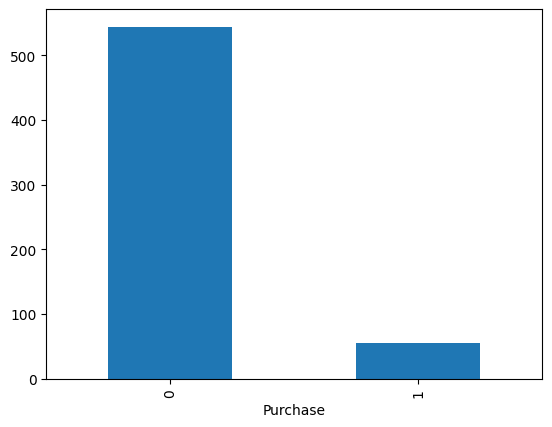

In [ ]:
y_2.value_counts().plot(kind='bar') #It's clearly unbalanced

In [ ]:
df.corr()

,Review_ID,Number_Words_Review,ZNumber_Words_Review,Prod_Desig,Prod_Design_positive,Prod_Design_negative,Prod_Technical,Prod_Technical_positive,Prod_Technical_negative,Prod_Price,...,Serv_Delivery_negative,Country,Gender,Age,Sentiment,Rating_Score,Purchase,Number_of_Purchases,Category_0,Category_1
Review_ID,1.000000e+00,-0.040375,-0.040375,0.012338,-0.014596,0.084586,0.011410,0.066393,-0.004400,-0.055824,...,-0.037803,-4.330133e-01,-0.023417,0.103857,-0.063988,0.045451,-0.095795,7.734669e-02,-1.020622e-01,2.030548e-18
Number_Words_Review,-4.037491e-02,1.000000,1.000000,0.136981,0.028192,0.218368,0.095845,0.007269,0.244529,-0.008404,...,0.063409,1.273490e-01,-0.027417,0.050843,-0.142707,-0.126581,0.050977,-4.400738e-02,-4.495543e-02,-7.079857e-02
ZNumber_Words_Review,-4.037491e-02,1.000000,1.000000,0.136981,0.028192,0.218368,0.095845,0.007269,0.244529,-0.008404,...,0.063409,1.273490e-01,-0.027417,0.050843,-0.142707,-0.126581,0.050977,-4.400738e-02,-4.495543e-02,-7.079857e-02
Prod_Desig,1.233764e-02,0.136981,0.136981,1.000000,0.701951,0.480784,-0.149512,-0.030922,-0.150916,-0.111332,...,-0.071624,-2.699661e-01,-0.046726,0.042232,0.031403,0.088691,0.052067,-7.353526e-02,-2.974985e-02,-5.949970e-02
Prod_Design_positive,-1.459585e-02,0.028192,0.028192,0.701951,1.000000,-0.038764,-0.065832,0.135191,-0.205088,-0.041487,...,-0.090526,-3.001668e-01,0.022639,0.046359,0.337937,0.341730,0.113887,5.860372e-03,-4.716666e-02,-1.886667e-02
Prod_Design_negative,8.458602e-02,0.218368,0.218368,0.480784,-0.038764,1.000000,-0.060143,-0.093285,-0.003972,-0.074116,...,-0.019020,-1.043523e-01,-0.084571,0.083375,-0.315356,-0.204918,-0.116936,-1.073151e-01,7.378824e-02,-4.071075e-02
Prod_Technical,1.140980e-02,0.095845,0.095845,-0.149512,-0.065832,-0.060143,1.000000,0.660371,0.250450,0.014413,...,-0.144033,-3.313445e-02,0.076255,-0.009253,0.046192,0.078464,0.018225,2.018856e-02,5.020627e-02,1.004125e-01
Prod_Technical_positive,6.639339e-02,0.007269,0.007269,-0.030922,0.135191,-0.093285,0.660371,1.000000,-0.289626,0.043511,...,-0.176053,-2.227177e-01,0.092505,0.004251,0.470676,0.578205,0.097999,1.119484e-01,-7.874260e-03,2.126050e-01
Prod_Technical_negative,-4.399886e-03,0.244529,0.244529,-0.150916,-0.205088,-0.003972,0.250450,-0.289626,1.000000,-0.108121,...,0.047194,1.276393e-01,-0.020739,0.011277,-0.496630,-0.505535,-0.066074,-9.846706e-02,-6.370913e-02,-1.911274e-01
Prod_Price,-5.582372e-02,-0.008404,-0.008404,-0.111332,-0.041487,-0.074116,0.014413,0.043511,-0.108121,1.000000,...,0.025074,-5.341955e-02,-0.032671,0.026382,0.068761,0.057736,0.047570,-1.304363e-02,2.158476e-02,7.824475e-02


In [ ]:
xprueba =  X_2.drop('Rating_Score', axis =1) #It's really correlated with Sentiment, with a 0.76 correlation index

In [ ]:
X_2 = sm.add_constant(xprueba)
logit_mod = sm.Logit(y_2, xprueba)
logit_res = logit_mod.fit(maxiter=100)
print(logit_res.summary())

         Current function value: 0.258094
         Iterations: 100
                           Logit Regression Results                           
Dep. Variable:               Purchase   No. Observations:                  600
Model:                          Logit   Df Residuals:                      585
Method:                           MLE   Df Model:                           14
Date:                Wed, 19 Mar 2025   Pseudo R-squ.:                  0.1679
Time:                        12:37:51   Log-Likelihood:                -154.86
converged:                      False   LL-Null:                       -186.11
Covariance Type:            nonrobust   LLR p-value:                 4.245e-08
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ZNumber_Words_Review        0.5015      0.142      3.543      0.000       0.224       0.779
Prod_Design_positive     

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


significative variables:
- Prod_Design_positive: P = 0.004
- Prod_Technical_negative: P = 0.075
- Prod_Price_positive: P = 0.089
- Prod_Price_negative: P = 0.084
- Country: P < 0.000
- Number_of_Purchases: P < 0.000
- Category_0: P = 0.009

In [ ]:
significative_variables = [

    "Prod_Design_positive",
    "Country",
    "Number_of_Purchases",
    "Category_0"
]

# 3: Number of Purchases in Relational History
Same situation as the y_2. Here, our target is also pretty unbalanced

In [ ]:
X_3 = pd.concat([xprueba, y_2], axis=1)

In [ ]:
X_3 =X_3.drop(target_3, axis=1)
y_3 = df[target_3]

<Axes: xlabel='Number_of_Purchases'>

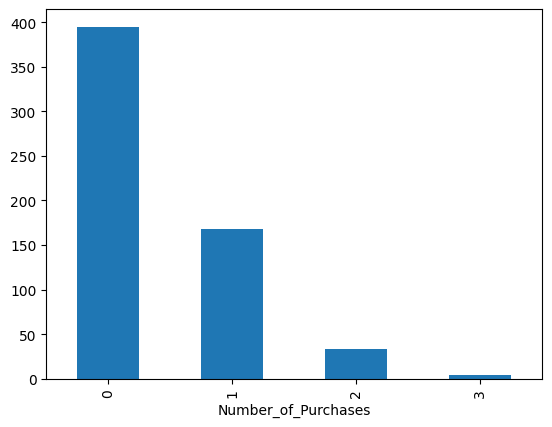

In [ ]:
y_3.value_counts().plot(kind='bar')

In [ ]:
y_3.value_counts()

,count
Number_of_Purchases,
0,395
1,168
2,33
3,4


We use the Poisson Regression because it's more useful for counts with a low variability, and since the number of purchases is from 0 to 3, this is exactly the proper case to use it.

In [ ]:
X_3 = sm.add_constant(X_3)
poisson_model = sm.GLM(y_3, X_3, family=sm.families.Poisson())
poisson_results = poisson_model.fit()
print("Poisson Regression Results:")
print(poisson_results.summary())

Poisson Regression Results:
                  Generalized Linear Model Regression Results                  
Dep. Variable:     Number_of_Purchases   No. Observations:                  600
Model:                             GLM   Df Residuals:                      584
Model Family:                  Poisson   Df Model:                           15
Link Function:                     Log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -456.75
Date:                 Wed, 19 Mar 2025   Deviance:                       479.28
Time:                         12:37:51   Pearson chi2:                     556.
No. Iterations:                      5   Pseudo R-squ. (CS):             0.1208
Covariance Type:             nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

Only
- Purchase
- Prod_design_positive
- And, if we allow it, with a significance of 10.5, also Sentiment is significant

#4: creating Interactions
We create interactions between the significant variables of the last model we just created

In [ ]:
X_3['Serv_Delivery_positive_&_Prod_Design_positive'] =X_3['Serv_Delivery_positive'] * X_3['Prod_Design_positive']
X_3['Purchase_&_Prod_Design_positive'] =X_3['Purchase'] * X_3['Prod_Design_positive']
X_3['Purchase_&_Serv_Delivery_positive'] =X_3['Purchase'] * X_3['Serv_Delivery_positive']

In [ ]:
X_3 = sm.add_constant(X_3)
poisson_model = sm.GLM(y_3, X_3, family=sm.families.Poisson())
poisson_results = poisson_model.fit()
print("Poisson Regression Results:")
print(poisson_results.summary())

Poisson Regression Results:
                  Generalized Linear Model Regression Results                  
Dep. Variable:     Number_of_Purchases   No. Observations:                  600
Model:                             GLM   Df Residuals:                      581
Model Family:                  Poisson   Df Model:                           18
Link Function:                     Log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -453.56
Date:                 Wed, 19 Mar 2025   Deviance:                       472.90
Time:                         12:44:14   Pearson chi2:                     553.
No. Iterations:                      5   Pseudo R-squ. (CS):             0.1301
Covariance Type:             nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

One of the ones that we created is actually significant: Sentiment_&_Prod_Design_positive